## Habitat Suitability 

<img src="images/blue-oak-woodland.png" alt="Blue oak woodland" width="780" height="480" longdesc="https://calscape.org/storage/app/species_images/calphotos/images/0000_0000_0113_0949.jpeg" />

#### Introduction

The blue oak (*Quercus douglasii*) is a deciduous [drought-tolerant](https://calscape.org/Quercus-douglasii-(Blue-Oak)) tree endemic to California. Blue oaks can be identified by their [blue-green foliage](https://oaks.cnr.berkeley.edu/oak-tree-species-id-ecology/), slightly to deeply lobed leaves, textured and pale gray bark, typical height between 20-60 ft., and natural settings of dry, rocky, and somewhat acidic to neutral soils. Acorns germinate in fall, appear in winter, and are propagated by species like the California Scrub-Jay which can [plant up to 3,300 oaks each year](https://www.allaboutbirds.org/guide/California_Scrub-Jay/lifehistory) (Tallamy, 2021). Most [seasonal development](https://www.fs.usda.gov/database/feis/plants/tree/quedou/all.html#114) occurs during March through May when water uptake is high and air temperatures rise. 

Across North America, oaks support more life than any other tree due to their caterpillar abundance. Caterpillars are necessary to sustain terrestrial food webs: they are a key survival food for baby birds and also support larger animals like bears. Within California, oak woodlands have one of the highest levels of biodiversity in the state, [sustaining over 5,000 plant and animal species](https://www.sacvalleycnps.org/oak-woodland/#:~:text=Habitat%20Values,and%20streams%20for%20anadromous%20fishes). The blue oak alone is estimated to [host approximately 170 moth and butterfly species](https://calscape.org/plant/Quercus-douglasii-(Blue-Oak)/host). This species can be found among [plant communities](https://calscape.org/Quercus-douglasii-(Blue-Oak)) such as chaparral, foothill woodland, and oak woodland at [elevations](https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_2/quercus/douglasii.htm) of 500-2000 ft. in the north and up to 5000 ft. in the south. The blue oak is dispersed throughout the state including in the central Sierra Nevada [Eldorado National Forest](https://www.fs.usda.gov/main/eldorado/about-forest/about-area) and the central Coast and Transverse Ranges in [Los Padres National Forest](https://www.fs.usda.gov/main/lpnf/about-forest).

#### Data Description

[National Forest System Land Units](https://data.fs.usda.gov/geodata/edw/datasets.php?xmlKeyword=forest) includes proclaimed national forest, purchase unit, national grassland, land utilization project, research and experimental area, national preserve, and other land area. An NFS Land Unit is nationally significant classification of Federally owned forest, range, and related lands that are administered by the USDA Forest Service or designated for administration through the Forest Service. 

[MACAv2-METDATA](https://climate.northwestknowledge.net/MACA/index.php) is a downscaled climate dataset that covers CONUS at 4 kilometers (1/24 degree) resolution. Temporal coverage encompasses historical model output (1950-2005) and projections (2006-2099) for climate normals represented as monthly values. Climate variables are from the Canadian Centre for Climate Modeling and Analysis ([CanESM2](https://nccasc.colorado.edu/project/canesm2-downscaled-climate-projections-800m-spatial-resolution-north-central-united-states)) model with simulations from two emissions scenarios (RCP 4.5 and 8.5). 

Probabilistic Remapping of SSURGO ([POLARIS](https://www.usgs.gov/publications/polaris-properties-30-meter-probabilistic-maps-soil-properties-over-contiguous-united)) soil properties is a dataset of 30‐m probabilistic soil property maps over the contiguous United States (CONUS). The mapped variables over CONUS include soil texture, organic matter, pH, saturated hydraulic conductivity, Brooks‐Corey and Van Genuchten water retention curve parameters, bulk density, and saturated water content.

The [SRTM 1 Arc-Second Global](https://doi.org/10.5066/F7PR7TFT) product offers global coverage of void filled elevation data at a resolution of 1 arc-second (30 meters). The Shuttle Radar Topography Mission (SRTM) was flown aboard the space shuttle Endeavour February 11-22, 2000.

#### Data Citation

Abatzoglou, J. T. & Brown, T. J. (2012). *MACAv2-METDATA* [Data set]. http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html

Chaney, N. W., Minasny, B., Herman, J. D., Nauman, T. W., Brungard, C. W., Morgan, C. L. S., McBratney, A. B., Wood, E. F., & Yimam, Y. (2019, February 5). POLARIS soil properties: 30-m probabilistic maps of soil properties over the contiguous United States. *Water Resources Research, 55*(4). https://doi.org/10.1029/2018WR022797

NASA. (2024). *SRTM 1 Arc-Second Global* [Data set]. https://doi.org/10.5066/F7PR7TFT

USDA Forest Service. (2024). *National Forest System Land Units* [Data set]. https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NFSLandUnit.zip

#### Methods

The land units [shapefile](https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NFSLandUnit.zip) was extracted and read into a GeoDataFrame with geopandas and subset for site locations. [earthaccess](https://earthaccess.readthedocs.io/en/latest/) (a library for NASA's Search API) retrieved digital elevation models by dataset ([SRTMGL1](https://doi.org/10.5066/F7PR7TFT)) which were scoped to spatial bounds collected from the unit sites. Mean soil data was selected for pH, depth, and location through [POLARIS](https://www.usgs.gov/publications/polaris-properties-30-meter-probabilistic-maps-soil-properties-over-contiguous-united). 

Data granules were processed into soil and elevation rasters through masking, scaling, cropping, and merging. The [xarray-spatial](https://docs.xarray.dev/en/stable/index.html) aspect function calculated aspect in degrees for each cell in a site elevation raster. Projected climate scenarios (medium and high emissions) for a monthly average of daily maximum near-surface air temperature in 2096-2099 were obtained from [MACAV2]((https://climate.northwestknowledge.net/MACA/index.php)), scoped to site boundaries, assigned a longitude coordinate range aligned with existing rasters, and converted from Kelvin to Fahrenheit. Sites and corresponding attributes were subsequently plotted using the [hvplot API](https://hvplot.holoviz.org/) and exported to rasters.

Given optimal characteristics for each site variable, a habitat suitability score may be identified leveraging a fuzzy Gaussian function to assign scores for each raster cell based on proximity to ideal site values. For each site and climate scenario, variable rasters can be harmonized across resolution and projection, suitability layers calculated and multiplied, subset for a suitable threshold with [xarray](https://docs.xarray.dev/en/stable/index.html), and combined into a final raster. 

#### Analysis

Import Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pathlib
import zipfile
from glob import glob
from math import floor, ceil

import pandas as pd
import numpy as np
import geopandas as gpd
import rioxarray as rxr
# Merge rasters
from rioxarray.merge import merge_arrays
import xarray as xr
import xrspatial

import matplotlib.pyplot as plt
# interactive plots of vector data
import hvplot.pandas
import hvplot.xarray

import earthaccess

Set Paths

In [2]:
# Images
images_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'images'
)

# Datasets
datasets_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'datasets'
)

# Project data directory 
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'data'
)

# Define directories for data
land_units_dir = os.path.join(data_dir, 'usfs-national-lands')
eldorado_elevation_dir = os.path.join(data_dir, 'srtm', 'eldorado')
los_padres_elevation_dir = os.path.join(data_dir, 'srtm', 'los_padres')

os.makedirs(images_dir, exist_ok=True)
os.makedirs(datasets_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
os.makedirs(eldorado_elevation_dir, exist_ok=True)
os.makedirs(los_padres_elevation_dir, exist_ok=True)

Load Utility Functions

In [3]:
def build_da(urls, bounds):
    """Build a DataArray from a list of urls"""
    
    all_das = []

    # Add buffer to bounds for plotting
    buffer = .025
    xmin, ymin, xmax, ymax = bounds
    bounds_buffer = (xmin-buffer, ymin-buffer, xmax+buffer, ymax+buffer)

    for url in urls:
        # Open data granule, mask missing data, scale data, 
        # and remove dimensions of length 1
        tile_da = rxr.open_rasterio(
                url,
                # For the fill/missing value
                mask_and_scale=True
            ).squeeze()
        # Unpack the bounds and crop tile
        cropped_da = tile_da.rio.clip_box(*bounds_buffer)
        all_das.append(cropped_da)

    merged = merge_arrays(all_das)
    return merged

In [4]:
def convert_longitude(longitude):
    """Convert longitude values from a range of 0 to 360 to -180 to 180"""
    
    return (longitude - 360) if longitude > 180 else longitude

In [5]:
def export_raster(da, raster_path):
    """Export raster DataArray to a raster file"""
    
    output_file = os.path.join(data_dir, os.path.basename(raster_path))
    da.rio.to_raster(output_file)

In [6]:
def harmonize_raster_layers(reference_raster, input_rasters, output_dir):
    """
    Harmonize raster layers to ensure consistent spatial resolution 
    and projection
    """
    
    # Load the reference raster
    ref_raster = rxr.open_rasterio(reference_raster, masked=True)
    harmonized_files = []
    for raster_path in input_rasters:
        # Load the input raster
        input_raster = rxr.open_rasterio(raster_path, masked=True)

        # Reproject and align the input raster to match the reference raster
        harmonized_raster = input_raster.rio.reproject_match(ref_raster)

        # Save the harmonized raster to the output directory
        output_file = os.path.join(output_dir, os.path.basename(raster_path))
        harmonized_raster.rio.to_raster(output_file)

        print(f"Harmonized raster saved to: {output_file}")
        harmonized_files.append(output_file)
        return harmonized_files

In [7]:
def plot_site(site_da, site_gdf, site_fig_name, plot_title, 
              bar_label, plot_cmap, boundary_clr):
    """Create custom site plot"""
    
    fig = plt.figure(figsize=(8, 6)) 
    ax = plt.axes()

    # Plot DataArray values
    site_plot = site_da.plot(
                            cmap=plot_cmap, 
                            cbar_kwargs={'label': bar_label}
                        )

    # Plot site boundary
    site_gdf.boundary.plot(ax=plt.gca(), color=boundary_clr)

    plt.title(f'{plot_title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    fig.savefig(f"{data_dir}/{site_fig_name}.png") 

    return site_plot

Load Data

In [8]:
# Only extract once
usfs_pattern = os.path.join(land_units_dir, '*.shp')

if not glob(usfs_pattern):
    usfs_zip = f'{datasets_dir}/S_USA.NFSLandUnit.zip'

    # Unzip data
    with zipfile.ZipFile(usfs_zip, 'r') as zip:
        zip.extractall(path=land_units_dir)

# Find the extracted .shp file path
usfs_land_path = glob(usfs_pattern)[0]

# Load USFS land units from shapefile
usfs_land_units_gdf = (
    gpd.read_file(usfs_land_path)
)

# Obtain units with location name
valid_units = usfs_land_units_gdf.dropna(subset=['HQ_LOCATIO'])

# Select only CA units
all_ca_units = valid_units[valid_units['HQ_LOCATIO'].str.contains('CA')]

In [9]:
earthaccess.login(strategy="interactive", persist=True)

In [10]:
# Search for Digital Elevation Models

ea_dem = earthaccess.search_datasets(keyword='SRTM DEM', count=15)
for dataset in ea_dem:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002
GFSAD30EUCEARUMECE Global Food Security-support Analysis Data (GFSAD) Cropland Extent 2015 Europe, Central Asia, Russia, Middle East product 30 m V001
GFSAD30SA

Explore Sites

In [11]:
# Los Padres National Forest
los_padres_gdf = all_ca_units.loc[
    all_ca_units['NFSLANDU_2'] == 'Los Padres National Forest'
]

# plot with EsriImagery basemap  
los_padres_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    title='Los Padres National Forest',
    fill_color=None, line_color='lightblue', line_width=3,
    frame_width=600, frame_height=600
)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [12]:
# Eldorado National Forest
eldorado_gdf = all_ca_units.loc[
    all_ca_units['NFSLANDU_2'] == 'Eldorado National Forest'
]

# plot with EsriImagery basemap  
eldorado_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    title='Eldorado National Forest',
    fill_color=None, line_color='lightblue', line_width=3,
    frame_width=600, frame_height=600
)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

Identify Soil Metric

In [13]:
def create_polaris_urls(soil_prop, stat, soil_depth, gdf_bounds):
    """Create POLARIS dataset urls using site bounds"""

    # Get latitude and longitude bounds from site
    min_lon, min_lat, max_lon, max_lat = gdf_bounds

    site_min_lon = floor(min_lon) 
    site_min_lat = floor(min_lat)  
    site_max_lon = ceil(max_lon)  
    site_max_lat = ceil(max_lat)

    all_soil_urls = []

    for lon in range(site_min_lon, site_max_lon): 
        for lat in range(site_min_lat, site_max_lat):
            current_max_lon = lon + 1
            current_max_lat = lat + 1

            soil_template = (
                "http://hydrology.cee.duke.edu/POLARIS/PROPERTIES/v1.0/"
                "{soil_prop}/"
                "{stat}/"
                "{soil_depth}/"
                "lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
            )

            soil_url = soil_template.format(
                soil_prop=soil_prop, stat=stat, soil_depth=soil_depth,
                min_lat=lat, max_lat=current_max_lat, 
                min_lon=lon, max_lon=current_max_lon
            )

            all_soil_urls.append(soil_url)

    return all_soil_urls

In [14]:
# Set site parameters
soil_prop = 'ph'
soil_prop_stat = 'mean'
# cm (the minimum depth for blue oaks is 1-2 ft)
soil_depth = '30_60'

# Build soil DataArrays 

# Eldorado site
ed_polaris_urls = create_polaris_urls(
                    soil_prop, soil_prop_stat, soil_depth, 
                    eldorado_gdf.total_bounds
                  )
eldorado_soil_da = build_da(
                    ed_polaris_urls, 
                    tuple(eldorado_gdf.total_bounds)
                  )
export_raster(eldorado_soil_da, "eldorado_soil_ph.tif")

# Los Padres site
lp_polaris_urls = create_polaris_urls(
                    soil_prop, soil_prop_stat, soil_depth, 
                    los_padres_gdf.total_bounds
                  )
los_padres_soil_da = build_da(
                      lp_polaris_urls, 
                      tuple(los_padres_gdf.total_bounds)
                    )
export_raster(los_padres_soil_da, "los_padres_soil_ph.tif")


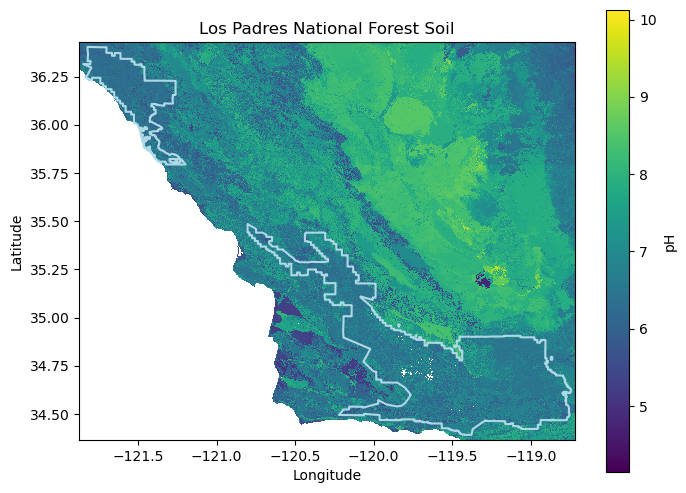

In [15]:
# Plot Los Padres soils

los_padres_soil_plt = plot_site(
    los_padres_soil_da, los_padres_gdf, 
    'Los-Padres-National-Forest-Soil', 
    'Los Padres National Forest Soil', 
    'pH', 'viridis', 'lightblue'
)

los_padres_soil_plt

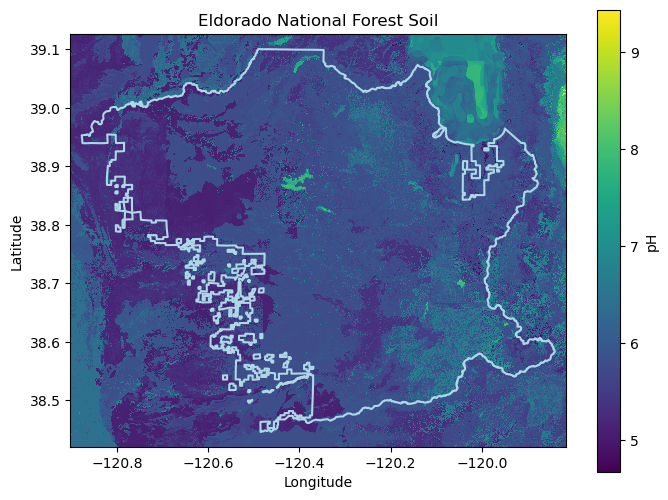

In [16]:
# Plot Eldorado soils

eldorado_soil_plt = plot_site(
    eldorado_soil_da, eldorado_gdf, 
    'Eldorado-National-Forest-Soil', 
    'Eldorado National Forest Soil', 
    'pH', 'viridis', 'lightblue'
)

eldorado_soil_plt

Select Digital Elevation Model

In [17]:
def select_dem(bounds, site_gdf, download_dir):
    """
    Create elevation DataArray from NASA Shuttle Radar Topography Mission data
    """

    # Returns data granules for given bounds
    strm_granules = earthaccess.search_data(
        # SRTMGL1: NASA Shuttle Radar Topography Mission 
        # Global 1 arc second V003
        short_name="SRTMGL1",
        bounding_box=bounds
    )

    # Download data granules
    earthaccess.download(strm_granules, download_dir)

    # Set SRTM data dir. hgt = height 
    strm_pattern = os.path.join(download_dir, '*.hgt.zip')

    # Build merged elevation DataArray
    strm_da = build_da(glob(strm_pattern), tuple(site_gdf.total_bounds))

    return strm_da    

In [18]:
eldorado_elev_da = select_dem(
                        tuple(eldorado_gdf.total_bounds), eldorado_gdf, 
                        eldorado_elevation_dir
                    )
export_raster(eldorado_elev_da, "eldorado_elevation.tif")

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

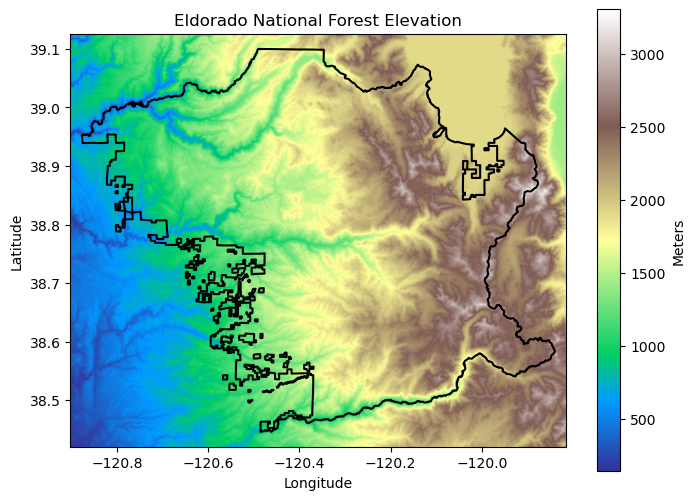

In [19]:
# Plot Eldorado elevation

eldorado_elev_plt = plot_site(
    eldorado_elev_da, eldorado_gdf, 
    'Eldorado-National-Forest-Elevation', 
    'Eldorado National Forest Elevation', 
    'Meters', 'terrain', 'black'
)

eldorado_elev_plt

In [20]:
los_padres_elev_da = select_dem(
                        tuple(los_padres_gdf.total_bounds), los_padres_gdf, 
                        los_padres_elevation_dir
                    )
export_raster(los_padres_elev_da, "los_padres_elevation.tif")

QUEUEING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/11 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/11 [00:00<?, ?it/s]

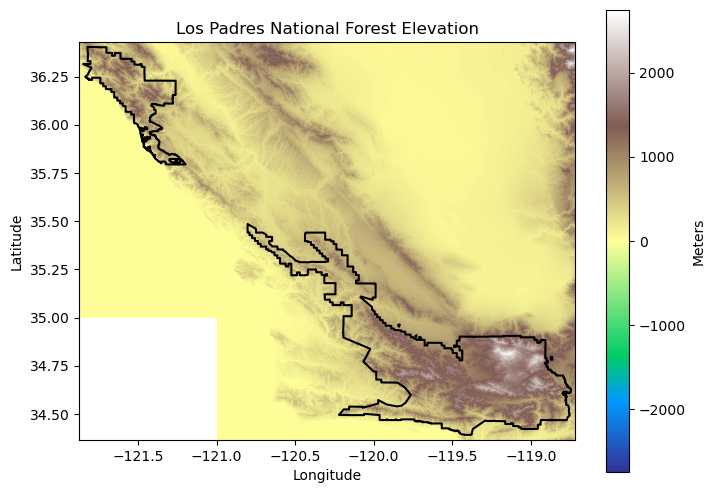

In [21]:
# Plot Los Padres elevation

los_padres_elev_plt = plot_site(
    los_padres_elev_da, los_padres_gdf, 
    'Los-Padres-National-Forest-Elevation', 
    'Los Padres National Forest Elevation', 
    'Meters', 'terrain', 'black'
)

los_padres_elev_plt

Calculate Aspect

In [22]:
def calculate_aspect(elev_da):
    """Create aspect DataArray from site elevation"""

    # Calculate aspect (degrees)
    aspect_da = xrspatial.aspect(elev_da)

    return aspect_da

In [23]:
# Calculate aspect

eldorado_aspect_da = calculate_aspect(eldorado_elev_da)
export_raster(eldorado_aspect_da, "eldorado_aspect.tif")

los_padres_aspect_da = calculate_aspect(los_padres_elev_da)
export_raster(los_padres_aspect_da, "los_padres_aspect.tif")

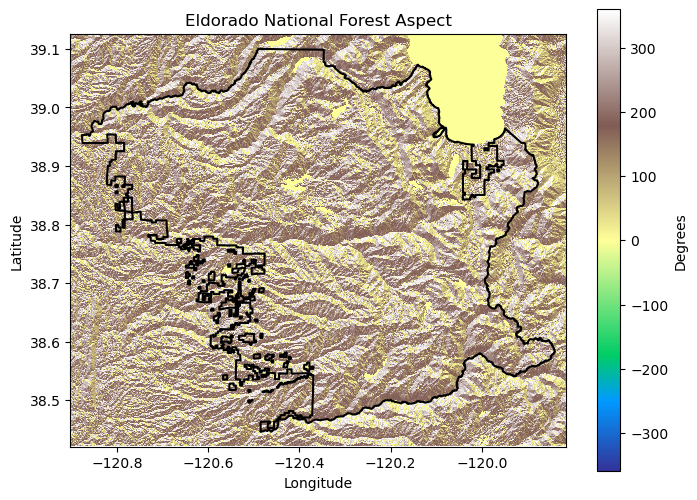

In [24]:
# Plot Eldorado aspect

eldorado_aspect_plt = plot_site(
    eldorado_aspect_da, eldorado_gdf, 
    'Eldorado-National-Forest-Aspect', 
    'Eldorado National Forest Aspect', 
    'Degrees', 'terrain', 'black'
)

eldorado_aspect_plt

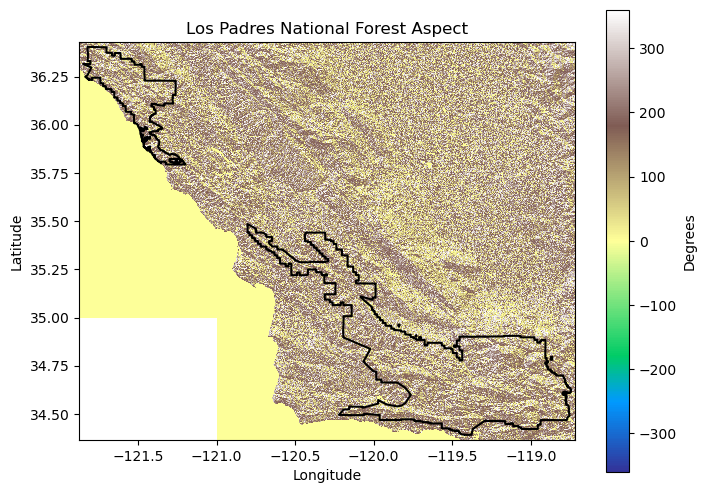

In [25]:
# Plot Los Padres aspect

los_padres_aspect_plt = plot_site(
    los_padres_aspect_da, los_padres_gdf,
    'Los-Padres-National-Forest-Aspect', 
    'Los Padres National Forest Aspect', 
    'Degrees', 'terrain', 'black'
)

los_padres_aspect_plt

Projected Climate

*Multivariate Adaptive Constructed Analogs (MACA) is a statistical method for downscaling Global Climate Models (GCMs) from their native coarse resolution to a higher spatial resolution.*

In [26]:
def get_projected_climate(site_gdf_dict, emissions_scenarios, 
                          start_year, end_year):
    """Create DataFrame of projected site climate"""

    maca_da_list = []

    for site_name, site_gdf in site_gdf_dict.items():
        for scenario in emissions_scenarios:
            
            MACA_URL = (
                'http://thredds.northwestknowledge.net:8080/thredds/dodsC' 
                '/MACAV2/CanESM2/macav2metdata_tasmax_CanESM2_r1i1p1_'
                f'{scenario}_{start_year}_{end_year}_CONUS_monthly.nc'
            )

            maca_da = xr.open_dataset(MACA_URL).squeeze()

            bounds = site_gdf.to_crs(maca_da.rio.crs).total_bounds

            # update coordinate range
            maca_da = maca_da.assign_coords(
                lon=("lon", [convert_longitude(l) for l in maca_da.lon.values])
            )

            maca_da = maca_da.rio.set_spatial_dims(x_dim='lon', y_dim='lat')

            maca_da = maca_da.rio.clip_box(*bounds)

            maca_da_list.append(dict(
                site_name=site_name,
                climate_scenario=scenario,
                da=maca_da)
            )

    maca_df = pd.DataFrame(maca_da_list)
    return maca_df 

In [27]:
# RCP 4.5 (Medium Emissions Scenario) and 8.5 (High Emissions Scenario)
emissions_scenarios = ['rcp45', 'rcp85']
site_gdf_dict = {'eldorado': eldorado_gdf, 'los padres': los_padres_gdf}
start_year = '2096'
end_year = '2099'

site_proj_temp = get_projected_climate(
                    site_gdf_dict, emissions_scenarios, 
                    start_year, end_year
                )

site_proj_temp

,site_name,climate_scenario,da
0,eldorado,rcp45,[air_temperature]
1,eldorado,rcp85,[air_temperature]
2,los padres,rcp45,[air_temperature]
3,los padres,rcp85,[air_temperature]


In [28]:
# Convert temperature from Kelvin to Fahrenheit

converted_das = []

rcp_rasters = [
    'eldorado_rcp45.tif','eldorado_rcp85.tif',
    'los_padres_rcp45.tif','los_padres_rcp85.tif'
]

for da, raster_name in zip(site_proj_temp.da.values, rcp_rasters): 
    da = da.assign(fahrenheit=da["air_temperature"] * 1.8 - 459.67)
    da = da.rio.write_crs(eldorado_soil_da.rio.crs)

    da = da.rename({'lon': 'x','lat': 'y'})

    da = da.fahrenheit
    converted_das.append(da)
    export_raster(da, raster_name)

[eldorado_rcp45_da, eldorado_rcp85_da, 
 los_padres_rcp45_da, los_padres_rcp85_da] = converted_das

In [31]:
# Select monthly average of daily maximum near-surface air temperature

air_eld_45 = eldorado_rcp45_da.sel(
                x=-120.9,y=38.4, method='nearest'
            )
air_eld_85 = eldorado_rcp85_da.sel(
                x=-120.9,y=38.4, method='nearest'
            )

air_lp_45 = los_padres_rcp45_da.sel(
                x=-118.7,y=36.4, method='nearest'
            )
air_lp_85 = los_padres_rcp85_da.sel(
                x=-118.7,y=36.4, method='nearest'
            )


In [32]:
# Plot Eldorado monthly mean max temperature data (2096-2099)

(
    air_eld_45.hvplot.line(
        title='Eldorado RCP 4.5 Average Max Temperature (2096-2099)',
        frame_width=550, frame_height=320
    )
    +
    air_eld_85.hvplot.line(
        title='Eldorado RCP 8.5 Average Max Temperature (2096-2099)',
        frame_width=550, frame_height=320, line_color='orange'
    )
)

:Layout
   .Curve.I  :Curve   [time]   (fahrenheit)
   .Curve.II :Curve   [time]   (fahrenheit)

In [33]:
# Plot Los Padres monthly mean max temperature data (2096-2099)

(
    air_lp_45.hvplot.line(
        title='Los Padres RCP 4.5 Average Max Temperature (2096-2099)',
        frame_width=550, frame_height=320
    )
    +
    air_lp_85.hvplot.line(
        title='Los Padres RCP 8.5 Average Max Temperature (2096-2099)',
        frame_width=550, frame_height=320, line_color='orange'
    )
)

:Layout
   .Curve.I  :Curve   [time]   (fahrenheit)
   .Curve.II :Curve   [time]   (fahrenheit)

For a given site/climate scenario combination, identify and plot suitability

In [34]:
def calculate_suitability_score(raster, optimal_value, tolerance_range):
    """ 
    Calculate a fuzzy suitability score (0–1) for each raster cell based on 
    proximity to the optimal value
    """

    # Calculate using a fuzzy Gaussian function to assign scores 
    # between 0 and 1
    suitability = np.exp(
                    -((raster - optimal_value) ** 2) 
                    / (2 * tolerance_range ** 2)
                )

    # A raster of suitability scores (0–1) 
    return suitability

In [36]:
def build_habitat_suitability_model(input_rasters, optimal_values, 
                                    tolerance_ranges, output_dir, raster_name, 
                                    threshold=None):
    """ 
    Build a habitat suitability model by combining fuzzy suitability scores 
    for each variable 
    """
    
    os.makedirs(output_dir, exist_ok=True)

    # Load and calculate suitability scores for each raster
    suitability_layers = []
    suit_zip = zip(input_rasters, optimal_values, tolerance_ranges)
    for raster_path, optimal_value, tolerance_range in suit_zip:
        raster = rxr.open_rasterio(raster_path, masked=True).squeeze()
        suitability_layer = calculate_suitability_score(
                                raster, optimal_value, tolerance_range
                            )
        suitability_layers.append(suitability_layer)

    # Combine suitability scores by multiplying across all layers
    combined_suitability = suitability_layers[0]
    for layer in suitability_layers[1:]:
        combined_suitability *= layer

    # Apply a threshold for highlighting highly suitable areas if provided
    if threshold is not None:
        combined_suitability = xr.where(
                                combined_suitability >= threshold, 
                                combined_suitability, 0
                            )

    # Save the combined suitability raster
    output_file = os.path.join(output_dir, f"{raster_name}.tif")
    combined_suitability.rio.to_raster(output_file)
    print(f"Combined suitability raster saved to: {output_file}")

    # Path to the final combined suitability raster
    return output_file

In [37]:
# Optimal values for species for each variable
# Variables: elevation, aspect, soil pH
optimal_values = [500.0, 300.0, 6.75]

# Tolerance ranges (acceptable deviation) for each variable
tolerance_ranges = [200.0, 50.0, 0.75]

# Optional threshold to highlight highly suitable areas
threshold = 0.8

In [38]:
# Suitability: Eldorado (RCP 4.5 and 8.5)

"""
Pseudocode:

eldorado_input_rasters = [
    f"{data_dir}/eldorado_elevation.tif",
    f"{data_dir}/eldorado_aspect.tif",
    f"{data_dir}/eldorado_soil_ph.tif"
]

# Ensure consistent spatial resolution and projection
eldorado_rcp45_rasters = harmonize_raster_layers(
                            f"{data_dir}/eldorado_rcp45.tif", 
                            eldorado_input_rasters, data_dir
                        )
eldorado_rcp85_rasters = harmonize_raster_layers(
                            f"{data_dir}/eldorado_rcp85.tif", 
                            eldorado_input_rasters, data_dir
                        )

# Build habitat suitability models

combined_suitability_file = build_habitat_suitability_model(
    eldorado_rcp45_rasters, optimal_values, tolerance_ranges, 
    data_dir, 'eldorado_rcp45_suitability', threshold
)

combined_suitability_file = build_habitat_suitability_model(
    eldorado_rcp85_rasters, optimal_values, tolerance_ranges, 
    data_dir, 'eldorado_rcp85_suitability', threshold
)
"""

'\nPseudocode:\n\neldorado_input_rasters = [\n    f"{data_dir}/eldorado_elevation.tif",\n    f"{data_dir}/eldorado_aspect.tif",\n    f"{data_dir}/eldorado_soil_ph.tif"\n]\n\n# Ensure consistent spatial resolution and projection\neldorado_rcp45_rasters = harmonize_raster_layers(\n                            f"{data_dir}/eldorado_rcp45.tif", \n                            eldorado_input_rasters, data_dir\n                        )\neldorado_rcp85_rasters = harmonize_raster_layers(\n                            f"{data_dir}/eldorado_rcp85.tif", \n                            eldorado_input_rasters, data_dir\n                        )\n\n# Build habitat suitability models\n\ncombined_suitability_file = build_habitat_suitability_model(\n    eldorado_rcp45_rasters, optimal_values, tolerance_ranges, \n    data_dir, \'eldorado_rcp45_suitability\', threshold\n)\n\ncombined_suitability_file = build_habitat_suitability_model(\n    eldorado_rcp85_rasters, optimal_values, tolerance_ranges, \n    data_

In [41]:
# Suitability: Los Padres (RCP 4.5 and 8.5)

"""
Pseudocode:

los_padres_input_rasters = [
    f"{data_dir}/los_padres_elevation.tif",
    f"{data_dir}/los_padres_aspect.tif",
    f"{data_dir}/los_padres_soil_ph.tif"
]

# Ensure consistent spatial resolution and projection
los_padres_rcp45_rasters = harmonize_raster_layers(
                            f"{data_dir}/los_padres_rcp45.tif", 
                            los_padres_input_rasters, data_dir
                           )
los_padres_rcp85_rasters = harmonize_raster_layers(
                            f"{data_dir}/los_padres_rcp85.tif", 
                            los_padres_input_rasters, data_dir
                           )

# Build habitat suitability models

combined_suitability_file = build_habitat_suitability_model(
    los_padres_rcp45_rasters, optimal_values, tolerance_ranges, 
    data_dir, 'los_padres_rcp45_suitability', threshold
)

combined_suitability_file = build_habitat_suitability_model(
    los_padres_rcp85_rasters, optimal_values, tolerance_ranges, 
    data_dir, 'los_padres_rcp85_suitability', threshold
)
"""

'\nPseudocode:\n\nlos_padres_input_rasters = [\n    f"{data_dir}/los_padres_elevation.tif",\n    f"{data_dir}/los_padres_aspect.tif",\n    f"{data_dir}/los_padres_soil_ph.tif"\n]\n\n# Ensure consistent spatial resolution and projection\nlos_padres_rcp45_rasters = harmonize_raster_layers(\n                            f"{data_dir}/los_padres_rcp45.tif", \n                            los_padres_input_rasters, data_dir\n                           )\nlos_padres_rcp85_rasters = harmonize_raster_layers(\n                            f"{data_dir}/los_padres_rcp85.tif", \n                            los_padres_input_rasters, data_dir\n                           )\n\n# Build habitat suitability models\n\ncombined_suitability_file = build_habitat_suitability_model(\n    los_padres_rcp45_rasters, optimal_values, tolerance_ranges, \n    data_dir, \'los_padres_rcp45_suitability\', threshold\n)\n\ncombined_suitability_file = build_habitat_suitability_model(\n    los_padres_rcp85_rasters, optimal_value

#### Discussion

Under both medium and high emissions scenarios, the average annual maximum temperatures are [projected to grow by 7.5°F to 10.9°F](https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd985002.pdf) at the end of the century (see RCP 4.5 vs. 8.5 Average Max Temperature plots). Intense precipitation events are projected as well, with the frequencies of [pronounced dry seasons and whiplash events](https://doi.org/10.1038/s41558-018-0140-y) expanding by over 50% across the state with a notable change in Southern California: a ~200% increase in extreme dry seasons, a ~150% increase in extreme wet seasons, and a ~75% increase in year-to-year whiplash. Blue oaks are equipped to withstand drier conditions compared to other native trees, abundant in areas with less conducive soils where they often cohabitate with pines. Nonetheless, the onset of a [severe drought diminishes the threshold of site tolerance](https://oaks.cnr.berkeley.edu/wp-content/uploads/2020/04/Swiecki-Bernhardt-Oak-Mortality-4.2-2020.pdf). Historically blue oak mortality has been generally attributed to decay fungi such as canker rots and root-rotting decay fungi. Pathogens like *Phytophthora ramorum*, the cause for sudden oak death, respond faster than trees to drought followed by high precipitation events, accelerating disintegration. The combination of disease and long-term climate stress contributes to raised levels of mortality years after drought. Additionally, although blue oaks have evolved in an environment where fires occur regularly and can survive low-to-moderate intensity fires, the threat of [conifer encroachment](https://oaks.cnr.berkeley.edu/conifer-encroachment/) subjects oaks to more canopy fire risk.

Los Padres National Forest is [vulnerable to floods](https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd497638.pdf) and debris flows after extreme precipitation events, in particular after recurrent wildfires, due to the forest’s position in the Coast and Transverse mountain ranges in relation to the coast. Sediment flow in Southern California has a history of high variability under El Niño Southern Oscillation (ENSO) events and has led to the destruction of oak riparian habitat. Future climate neutral scenarios predict higher nighttime minimum temperatures in the forest and subsequently an [expansion of mixed woodland](https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd497638.pdf) with oaks replacing conifer-dominated areas. 

Eldorado National Forest is similarly projected to experience extreme climate variability between wet and dry years. Toward the end of the century at the lowest and highest elevations in the Sierra Nevada, warming temperatures will lead to greater evaporation and a [projected ~15% reduction in fuel and soil moisture](https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd985002.pdf). This scenario indicates greater drought likelihood and impacts across native plant communities. Heightened fire weather conditions will generate [shifts in blue oak mortality rates](https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd985002.pdf) as well as post-fire germination. Moreover a shift in oak mortality affects fire activity. Blue oak sites with [south-facing aspects](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecs2.3558) in particular demonstrate lower potential for accumulated drainage and thus the highest level of mortality compared to other aspects. These sites are especially at risk for greater dead woody surface fuels, enhancing the probability of larger fires over longer periods.

#### References


Barrett, A., Battisto, C., J. Bourbeau, J., Fisher, M., Kaufman, D., Kennedy, J., … Steiker, A. (2024). *earthaccess* (Version 0.12.0) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.8365009

California Native Plant Society (CNPS). (n.d.). Blue oak. https://calscape.org/Quercus-douglasii-(Blue-Oak)

Collins, B., Hetzel, J. T., & Metzger, T. C. (2024). *xarray-spatial* (Version 0.4.0) [Computer software]. GitHub. https://github.com/makepath/xarray-spatial/releases/tag/v0.4.0

Estes, B. & Gross, S. (2020). *Eldorado National Forest climate change trend summary.* USDA Forest Service. https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd985002.pdf

Huesca, M., Ustin, S. L., Shapiro, K. D., Boynton, R., & Thorne, J. H. (2021, June 16). Detection of drought-induced blue oak mortality in the Sierra Nevada Mountains, California. Ecosphere, 12(6). https://doi.org/10.1002/ecs2.3558

Hunter, J. D. (2024). *Matplotlib: A 2D graphics environment* (Version 3.9.2) [Computer software]. Zenodo. https://zenodo.org/records/13308876

Jordahl, K., Van den Bossche, J., Fleischmann, M., Wasserman, J., McBride, J., Gerard, J., … Leblanc, F. (2024). *geopandas/geopandas: v1.0.1* (Version 1.0.1) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.12625316 

Molinari, N., Sawyer, S., & Safford, H. (n.d.). *A summary of current trends and probable future trends in climate and climate-driven processes in the Los Padres National Forest and neighboring lands.* USDA Forest Service. https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/fseprd497638.pdf

Point Blue Conservation Science. (n.d.). *California oak planting guide.* https://www.pointblue.org/wp-content/uploads/2023/06/Planting-Oaks-Guide-Version-1.pdf

Python Software Foundation. (2024). *Python* (Version 3.12.6) [Computer software]. https://docs.python.org/release/3.12.6 

Rudiger, P., Liquet, M., Signell, J., Hansen, S. H., Bednar, J. A., Madsen, M. S., … Hilton, T. W. (2024). *holoviz/hvplot: Version 0.11.0* (Version 0.11.0) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.13851295 

Sacramento Valley Chapter (CNPS). (n.d.). *Oak woodland.* https://www.sacvalleycnps.org/oak-woodland/#:~:text=Habitat%20Values,and%20streams%20for%20anadromous%20fishes

Snow, A. D., Scott, R., Raspaud, M., Brochart, D., Kouzoubov, K., Henderson, S., … Weidenholzer, L. (2024). *corteva/rioxarray: 0.18.1 Release* (Version 0.18.1) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.4570456

Swain, D. L., Langenbrunner, B., Neelin, J. D., & Hall, A. (2018). Increasing precipitation volatility in twenty-first-century California. *Nature Climate Change, 8*(5), 427. https://doi.org/10.1038/s41558-018-0140-y

Swiecki, T. & Bernhardt, E. (2020). *Recent increases in blue oak mortality.* Phytosphere Research. https://oaks.cnr.berkeley.edu/wp-content/uploads/2020/04/Swiecki-Bernhardt-Oak-Mortality-4.2-2020.pdf

Tallamy, D. W. (2021). *The nature of oaks: The rich ecology of our most essential native trees.* Timber Press.

The pandas development team. (2024). *pandas-dev/pandas: Pandas* (Version 2.2.2) [Computer software]. Zenodo. https://doi.org/10.5281/zenodo.3509134

UC Oaks. (n.d.). *Blue oak-foothill pine woodland & wildlife habitat*. https://oaks.cnr.berkeley.edu/blue-oak-foothill-pine-woodland-wildlife-habitat

UC Oaks. (n.d.). *Coastal oak woodland & wildlife habitat.* https://oaks.cnr.berkeley.edu/coastal-oak-woodland/

UC Oaks. (n.d.). *Conifer encroachment.* https://oaks.cnr.berkeley.edu/conifer-encroachment/

UC Oaks. (2024, July 1). *Oak tree species ID & ecology.* https://oaks.cnr.berkeley.edu/oak-tree-species-id-ecology

USDA Forest Service. (n.d.). *About the area*. https://www.fs.usda.gov/main/eldorado/about-forest/about-area

USDA Forest Service. (n.d.). *About the forest*. https://www.fs.usda.gov/main/lpnf/about-forest

USDA Forest Service. (n.d.). *Quercus douglasii*. https://www.fs.usda.gov/database/feis/plants/tree/quedou/all.html

USDA Southern Research Station. (n.d.). *Quercus douglasii*. https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_2/quercus/douglasii.htm
